<h1 style="color:Red;"> Importing the libaries </h1>

In [6]:
import pandas as pd
import numpy as np

<h1 style="color:Green;"> Sanitisation </h1>

In [7]:
FullSetClean = pd.read_csv("data_edited3.csv")

#####
"""
Put Further Sanitation Code here.
OR any sanitation code
"""
FullSetClean = FullSetClean.drop(columns = "currency")

stateBin = []
for row in FullSetClean["state"]:
    if row == "successful":
        stateBin.append(1)
    else:
        stateBin.append(0)

FullSetClean["StateBin"] = stateBin
FullSetClean = FullSetClean.drop(columns = "state")
FullSetClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45585 entries, 0 to 45584
Data columns (total 9 columns):
name                45585 non-null object
category            45585 non-null object
deadline            45585 non-null object
launched            45585 non-null object
backers             45585 non-null int64
country             45585 non-null object
usd_pledged_real    45585 non-null float64
usd_goal_real       45585 non-null float64
StateBin            45585 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 3.1+ MB


<h1 style="color:Fuchsia;"> The functions related to the words </h1>

<h1 style="color:Teal;"> Letter Related Functions </h1>

In [8]:

def StartingChar(string : str): # discontinued as does not output a numerical number that could be used later.
    return string[0]

def Length(string : str):
    return len(string)

def NumberOfWords(string :  str):
    output = 0
    string = string.split()
    for word in string:
         if any(c.isalpha() for c in word): ##sees if there is a letter in the collection of chars
                output += 1
    return output

def Capitilisation(string : str):
    plus = 0
    minus = 0
    for char in string:
        if char.islower():
            plus +=1
        elif char.isupper():
            minus += 1
    return (plus/(plus + minus))

def Punctuation(string : str):
    plus = 0
    minus = 0
    for char in string:
        if char in ". , / ? ; : ‘ () !”":
            plus +=1
        else:
            minus += 1
    return (plus/(plus + minus))

def nonPunctuation(string:str):
    plus = 0
    minus = 0
    for char in string:
        if char in "\|£$%^&*-_+={}[]@~#<>¬":
            plus +=1
        else:
            minus += 1
    return (plus/(plus + minus))

def Vowels(string : str):
    plus = 0
    minus = 0
    string = string.lower()
    for char in string:
        if char in "aeiou":
            plus += 1
        elif char.isalpha():
            minus += 1
    return (plus/(plus + minus))

def Plositives(string : str):
    plus = 0
    minus = 0
    string = string.lower()
    for char in string:
        if char in "ptkbdg":
            plus += 1
        elif char.isalpha():
            minus += 1
    return (plus/(plus + minus))

def frictives(string : str):
    plus = 0
    minus = 0
    string  = string.lower()
    for char in string:
        if char in "fsvz":
            plus += 1
        elif char.isalpha():
            minus += 1
    return (plus/(plus + minus))

def alliteration(string : str):
    output = 0
    string = string.lower()
    string = string.split()
    previousLetter = ""
    output = 0
    for word in string:
        if word[0] == previousLetter:
                output += 1
        else:
            previousLetter = word[0]
        
    return output

functionList = [
                [Length , "Word Length"],
                [NumberOfWords , "Number Of Words"],
                [Capitilisation , "Capitilisation"],
                [Punctuation , "Punctuation"],
                [nonPunctuation , "nonPunctuation"],
                [Vowels , "Vowels"],
                [Plositives, "Plositives"],
                [frictives,"frictives"],
                [alliteration,"alliteration"]
               ]
    
print(NumberOfWords("Test Test test a!")) 
print (frictives("test test test"))
print (Capitilisation("TEst Test Test"))
print (alliteration("Fest Test test"))

4
0.25
0.6666666666666666
1


In [9]:
# At some point this will be changed to a genralised function.
#base plan:
#all the analytics function will take a string return a number (float or int 64 )

#there will be an itterator high order function that takes the analytic function. 
#and the applies it to all of the titles and returns a list


###The itterator high order

def itterator(function,ColName,dataSet):
    output = list()
    for n , string in enumerate(dataSet["name"]):
        output.append(function(string))
    dataSet[ColName] = output
    


In [10]:

for point in functionList:
    itterator(point[0],point[1],FullSetClean)
    print(point[0])

print ("done functions")

<function Length at 0x0000022DC0742158>
<function NumberOfWords at 0x0000022DC1B22B70>
<function Capitilisation at 0x0000022DC1B22D08>
<function Punctuation at 0x0000022DC1B22D90>
<function nonPunctuation at 0x0000022DC1B22C80>
<function Vowels at 0x0000022DC1B22E18>
<function Plositives at 0x0000022DC1B22EA0>
<function frictives at 0x0000022DC1B22F28>
<function alliteration at 0x0000022DC1E9F048>
done functions


<h1 style="color:Orange;"> Time Related Functions </h1>

In [11]:
import datetime
def dateTimeitterator(dataSet):
    Launchweekdays = []
    Launchhours = []
    elapsedDays= []
    deadlineweekdays = []
    draw = []
    sraw = []
    
    for n , string in enumerate(dataSet["launched"]):
        date , time = string.split(" ")
        day , month ,year = date.split("/")
        hour, mineut = time.split(":")
        raw = datetime.date(int(year), int(month), int(day))

        
        Launchweekdays.append(int(raw.weekday()))
        Launchhours.append(int(hour))
        sraw.append(raw)
        
    for n , string in enumerate(dataSet["deadline"]):
        
        day , month ,year = string.split("/")
        hour, mineut = time.split(":")
        raw = datetime.date(int(year), int(month), int(day))
        deadlineweekdays.append(raw.weekday())
        draw.append(raw)
        

    elapsedDays = [(a - b).days for a, b in zip(sraw, draw)]
    dataSet["LaunchWeekday"] = Launchweekdays
    dataSet["LaunchHour"] =  Launchhours
    dataSet["elapsedDay"] = elapsedDays
    dataSet["deadlineWeekday"] = deadlineweekdays
    
 

In [12]:

dateTimeitterator(FullSetClean)
print ("done Timeritterato")

done Timeritterato


<h1 style="color:salmon;"> Data Base Splitting (to be added data base correction) Please put balancing code here </h1>

In [23]:
# Data base splitting done bellow 

from sklearn.model_selection import train_test_split

train,other = train_test_split(FullSetClean, test_size=0.6,random_state=0);

validation , test = train_test_split(other, test_size=0.5,random_state=0);

train.head()

# FullSetClean.head()
# FullSetClean.info(verbose = True)

# BALANCES THE DATASET (undersampling majority class):

total = len(FullSetClean)
nb_pos = FullSetClean['StateBin'].sum()
nb_neg = total - nb_pos

success_pos = FullSetClean.loc[FullSetClean['StateBin'] == 1]
success_neg = FullSetClean.loc[FullSetClean['StateBin'] == 0].sample(nb_pos)

resampled_FullSetClean = pd.concat((success_pos, success_neg))

# CHECKS THAT RESAMPLING HAS BEEN SUCCESFUL:

# total = len(resampled_FullSetClean)
# nb_pos = resampled_FullSetClean['StateBin'].sum()
# nb_neg = total - nb_pos

# print('Successful: {}' .format(nb_pos))
# print('Failed: {}' .format(nb_neg))

<h1 style="color:Purple;"><i> Now for the word proccessing </i></h1>

In [2]:
import re

def sanitiser(title : str) -> list: #takes a string splits into words , makes lower case and removes punctuation
    words = title.split()
    output = []
    for word in words:
       output.append(re.sub(r'\W+', '', word).lower())
    return output

def WordFinder(dataSet,cutoff : int) -> dict and list: #so takes in the data set , a cut off an renturns a list of all words above the cutoff and their percentage chance of succsess
    LargeWordDictionary = {} #The dict for all of the words 
    
    for n , title in enumerate(dataSet["name"]): #goes through the big old list
        temp = sanitiser(title) #sanitises the function
        for word in temp: #basically sees if the word is already in the large list of words if it is then it adds its location in the data base to the end of the dict entry
            try:
                LargeWordDictionary[word].append(n)
            except KeyError:
                LargeWordDictionary[word] = [n]
                
    SmallWordDictionary = {} #small output dictionary
    StateBin = dataSet["StateBin"].tolist() #transfers database to list due to pandas related issues
    for word in LargeWordDictionary: # goes through large dictionary , counts number of instances of each word appearing , and then uses the pointers to find if they were success 
        Suc = 0
        for pointer in LargeWordDictionary[word]:
            Suc += StateBin[int(pointer)]
        length = len(LargeWordDictionary[word])
        if length >= cutoff:
            SmallWordDictionary[word] = [length , Suc/length]
    print(len(SmallWordDictionary))
    
    WordLevels = [[a,[]] for a in range(10)]
    for word in SmallWordDictionary:
        WordLevels[int(SmallWordDictionary[word][1]*10)][1].append(word)
    
    return SmallWordDictionary , WordLevels
        
    #return LargeWordDictionary

penis = 80083

def WordScore(title : str,AssementDictionary : dict ,split : int) ->list:
    title = sanitiser(title)
    output = [0 for i in range(split)]
    unique = 0
    for word in title:
        try:
            temp = AssementDictionary[word][1]
            for i in range(split):
                if temp > 1 *((i+1)/split):
                    pass
                else:
                    output[i] += 1
                    break
        except KeyError:
            unique += 1
    return output , unique


        
    
    

sanitiser("ghgh ghgh!!!!  FDKFKF  g")


['ghgh', 'ghgh', 'fdkfkf', 'g']

In [3]:
testAll,TestClasses = WordFinder(test,40)

print(TestClasses)

print (WordScore("miniatures blank food",testAll,10))



NameError: name 'test' is not defined

<h1 style="color:Navy;"> Machine Learning Code Taken From Tutorial </h1>

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

def select_column_to_add(X_train, y_train, X_val, y_val, columns_in_model, columns_to_test):
    
    column_best = None
    columns_in_model = list(columns_in_model)
    
    if len(columns_in_model) == 0:
        acc_best = 0
    elif len(columns_in_model) == 1:
        mod = LogisticRegression(C=1e9).fit(X_train[columns_in_model].values.reshape(-1, 1), y_train)
        acc_best = accuracy_score(y_val, mod.predict(X_val[columns_in_model].values.reshape(-1, 1)))
    else:
        mod = LogisticRegression(C=1e9).fit(X_train[columns_in_model], y_train)
        acc_best = accuracy_score(y_val, mod.predict(X_val[columns_in_model]))

    
    for column in columns_to_test:
        mod = LogisticRegression(C=1e9).fit(X_train[columns_in_model+[column]], y_train)
        y_pred = mod.predict(X_val[columns_in_model+[column]])
        acc = accuracy_score(y_val, y_pred)
        
        if acc - acc_best >= 0.005:  # one of our stopping criteria
            acc_best = acc
            column_best = column
        
    if column_best is not None:  # the other stopping criteria
        print('Adding {} to the model'.format(column_best))
        print('The new best validation accuracy is {}'.format(acc_best))
        columns_in_model_updated = columns_in_model + [column_best]
    else:
        print('Did not add anything to the model')
        columns_in_model_updated = columns_in_model
    
    return columns_in_model_updated, acc_best

In [5]:
dropstuff = ["StateBin","name","category","deadline","launched","country","usd_goal_real","usd_pledged_real","backers"]

Ytrain = train[["StateBin"]]  #what you want to predict
Xtrain = train.drop(columns = dropstuff) #all the other data
Yval = validation[["StateBin"]]  #what you want to predict
Xval = validation.drop(columns = dropstuff) #all the other data

Xtrain.info()


NameError: name 'train' is not defined

In [17]:
columns_to_test = set(Xtrain)
full_list = set(Xtrain)

columns_in_model = list();

for i in range(4):
    columns_in_model , acc = select_column_to_add(Xtrain,Ytrain,Xval,Yval,columns_in_model,columns_to_test)    
    columns_to_test = full_list.difference(columns_in_model)

Adding alliteration to the model
The new best validation accuracy is 0.5868372943327239
Did not add anything to the model
Did not add anything to the model
Did not add anything to the model


<h1 style="color:DodgerBlue;"> Now For the Graphs </h1>

In [20]:
def percentageAtIntervalFloat(dataSet ,varible : str,splits : int) -> list :
    #create the search thing
    minimum = dataSet[varible].min()
    maximum = dataSet[varible].max()
    print(minimum , maximum)
    difference = maximum - minimum
    space = difference / splits
    output = [[a,[0,0]] for a in np.arange(minimum,maximum,space)]
    testLevels = [a for a in np.arange(minimum,maximum,space)]
    Values = dataSet[varible].tolist()
    successes = dataSet["StateBin"].tolist()
    
    for Value , success in zip(Values,successes):
        for n , level in enumerate(testLevels):
            if Value <= level:
                if  success == 1:
                    output[n][1][1] += 1
                else:
                    output[n][1][0] += 1
                break
    
    percentOutput = []
    for level in output:
        if level[1][1] == 0:
            percentOutput.append(0)
        else:
            percentOutput.append(level[1][1]/(level[1][1]+level[1][0]))
    return percentOutput

def percentageAtIntervalInt(dataSet ,varible : str) -> list : ###Recode so that it works with intergers
    #create the search thing
    minimum = dataSet[varible].min()
    maximum = dataSet[varible].max()
    difference = maximum - minimum
    output = [[a,[0,0]] for a in np.arange(minimum,maximum)]
    testLevels = [a for a in np.arange(minimum,maximum)]
    Values = dataSet[varible].tolist()
    successes = dataSet["StateBin"].tolist()
    
    for Value , success in zip(Values,successes):
        for n , level in enumerate(testLevels):
            if Value <= level:
                if  success == 1:
                    output[n][1][1] += 1
                else:
                    output[n][1][0] += 1
                break
    
    percentOutput = []
    for level in output:
        if level[1][1] == 0:
            percentOutput.append(0)
        else:
            percentOutput.append(level[1][1]/(level[1][1]+level[1][0]))
    return percentOutput
    

Word Length
1 60
Number Of Words
1 16
Capitilisation
0.0 1.0
Punctuation
0.0 0.5666666666666667
nonPunctuation
0.0 0.46153846153846156
Vowels
0.0 1.0
Plositives
0.0 1.0
frictives
0.0 0.6666666666666666
alliteration
0 6


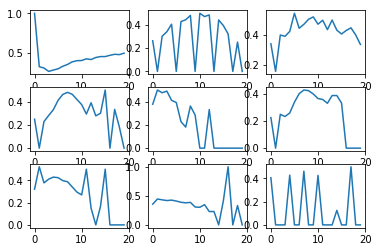

In [23]:
import matplotlib.pyplot as plt
test["Vowels"].max()
for n , Fun in enumerate(functionList):

    print(Fun[1])
    LookList = percentageAtIntervalFloat(FullSetClean , Fun[1],20)
    plt.subplot(3,3,n + 1)
    plt.plot(LookList)